# Loading the Packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [5]:
from subprocess import check_output

# Loading the Data

In [6]:
companies = pd.read_csv('Y Combinator.csv')

In [7]:
companies.head()

,name,vertical,year,batch,url,description
0,Clickfacts,B2B,2005,s2005,http://clickfacts.com,NaN
1,Kiko,Consumer,2005,s2005,http://kiko.com,We're the best online calendar solution to eve...
2,Loopt,Enterprise,2005,s2005,http://loopt.com,NaN
3,Parakey,Consumer,2005,s2005,http://parakey.com,NaN
4,Reddit,Consumer,2005,s2005,http://reddit.com,NaN


# Number of Companies funded by Y Combinator

In [8]:
print ("The total number of companies funded by YC since 2005:", companies.shape[0])

The total number of companies funded by YC since 2005: 883


# Summary of Data

In [9]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
name           883 non-null object
vertical       874 non-null object
year           883 non-null int64
batch          883 non-null object
url            882 non-null object
description    833 non-null object
dtypes: int64(1), object(5)
memory usage: 41.5+ KB


# Getting the Null Values

In [10]:
companies.isnull()

,name,vertical,year,batch,url,description
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
5,False,False,False,False,False,True
6,False,False,False,False,False,True
7,False,False,False,False,False,True
8,False,False,False,False,False,True
9,False,False,False,False,False,False


# Heatmap of the Y Combinator Columns

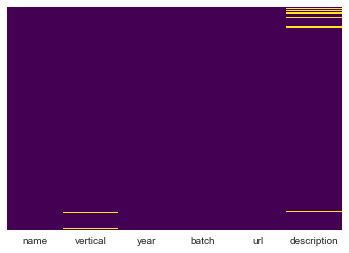

In [11]:
sns.heatmap(companies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Exploratory Data Analysis

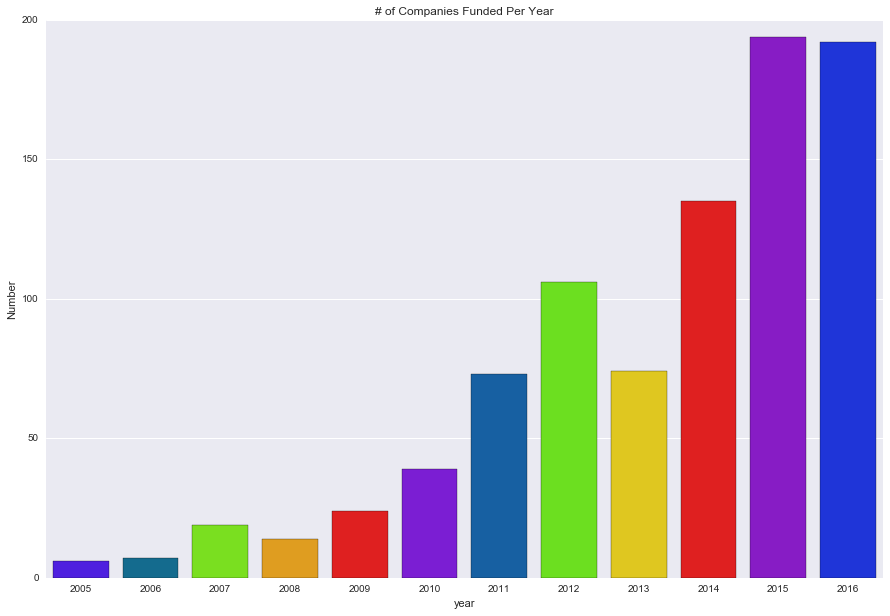

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(data=companies,x='year',palette='prism')
plt.title('# of Companies Funded Per Year')
plt.ylabel('Number')

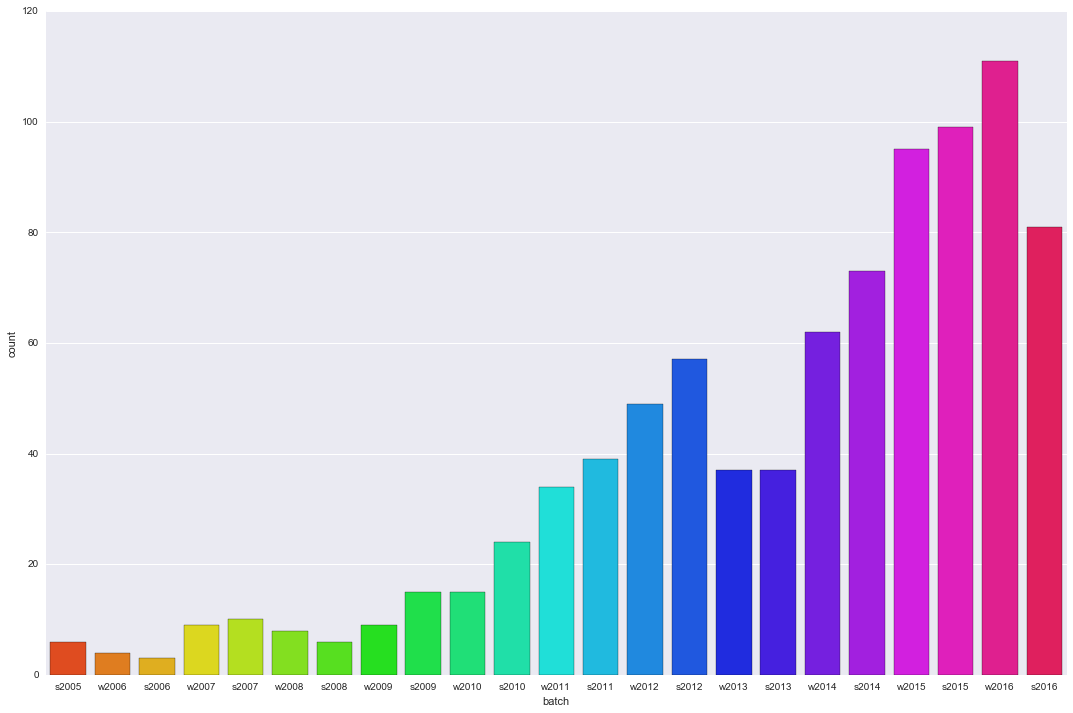

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data=companies,x='batch',palette='hsv')
plt.tight_layout()

# Companies that the YC funds:

In [36]:
print ("The total number of areas YC invests in", len(companies.vertical.unique()))

The total number of areas YC invests in 10


In [37]:
companies.vertical.unique()

array(['B2B', 'Consumer', 'Enterprise', 'Fintech', 'Developer Tools',
       'Marketplace', 'Education', 'Hardware', nan, 'Biomedical'], dtype=object)

# Industries that the Company that Invested In

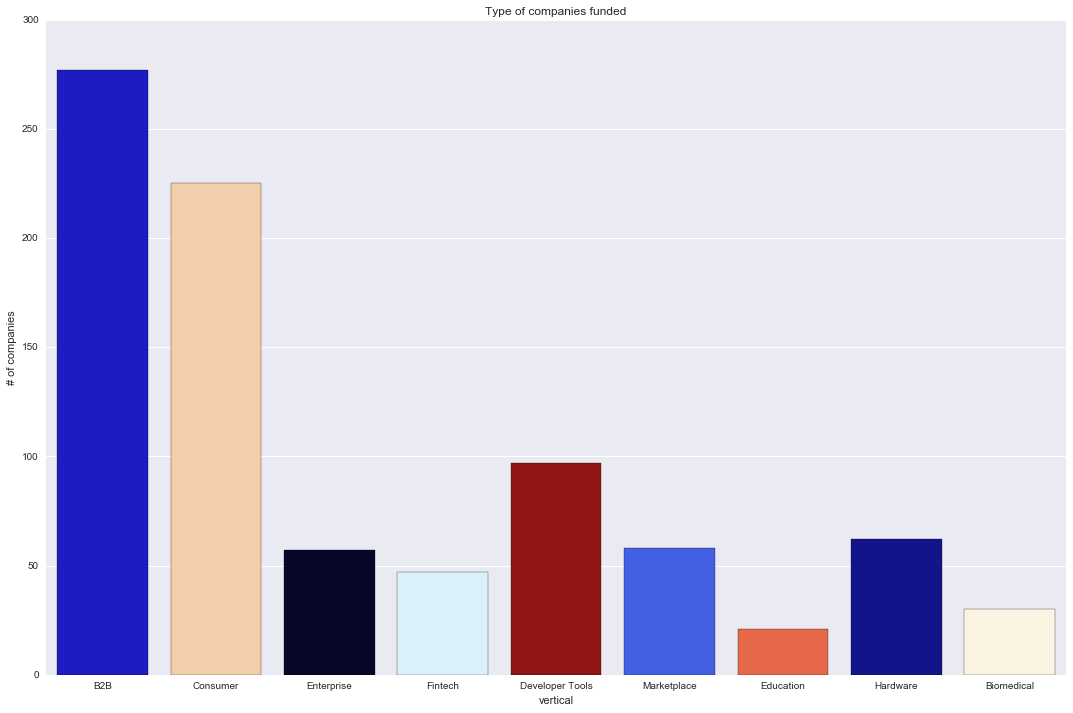

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(data=companies,x='vertical',palette='flag')
plt.title('Type of companies funded')
plt.ylabel('# of companies')
plt.tight_layout()

# Industries that Y Combinator Invested In

In [40]:
print ("B2B companies form" ,
       round((companies['vertical']=='B2B').value_counts()[1]/float(len(companies))*100),"% of YC portfolio")

B2B companies form 31.0 % of YC portfolio


# Industries that Y Combinator Have Progressed In

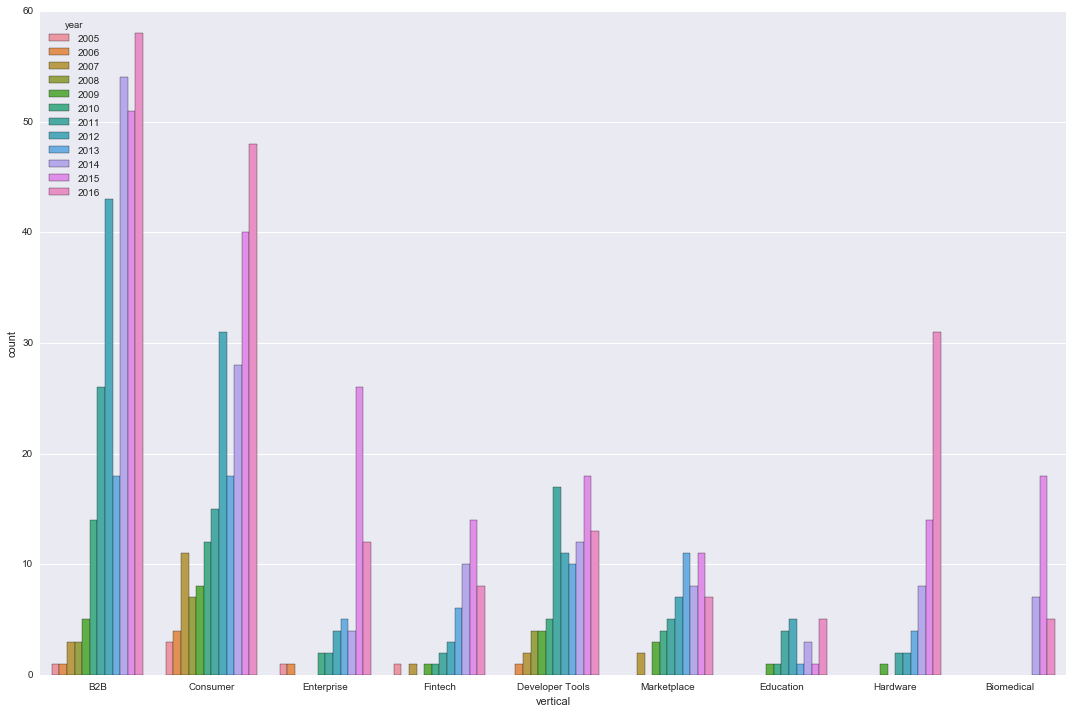

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(data=companies,x='vertical',hue='year')
plt.tight_layout()

It has turned out that for years 2015 and 2016, Y Combinator has been funding the most start-up organizations. B2B and Consumer markets have become one of the bigger commodities that the public would be interested in. Based on the research from the company website, there are some firms that went on to be successful. An example would be Dropbox, Airbnb, Stripe, Instacart, among others. W2016 is the time when Y Combinator provided most seed money to fund the organizations. It has been planned that the company would visit 11 different countries to expand startup culture to others.   